In [2]:
%load_ext autoreload
%autoreload 2

from heizlast import House, WeatherData

In [3]:
climate = WeatherData(nyears=1)

climate.load_data()

sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredict

In [4]:
climate.data.groupby(climate.data.index.year)['radiation'].sum()

date
2022    731.150154
2023    413.316396
Name: radiation, dtype: float64

In [4]:
climate.data.plot(subplots=True)

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

Error in callback <function flush_figures at 0x000001596806BEC0> (for post_execute), with arguments args (),kwargs {}:


In [83]:
# Haus erstellen und Wand hinzufügen
house = House(
    climate_data = climate.data
)
house.add_wall(
    name='Außenwand',
    area=2*(8.6+8.4)*2.70*2, 
    layers_info=[
        {'name': 'Innenputz aus Gipsputzmörtel', 'thickness': 10.0, 'thermal_conductivity': 1.01},
        {'name': 'Leichtbeton', 'thickness': 200, 'thermal_conductivity': 0.48},
        {'name': 'Mineralwolledämmung', 'thickness': 90, 'thermal_conductivity': 0.045},
        {'name': 'Ziegel', 'thickness': 120, 'thermal_conductivity': 0.72},
        #{'name': 'Hartschaum XPS', 'thickness': 0.035, 'thermal_conductivity': 0.044},
        {'name': 'Kunstharzputz', 'thickness': 12, 'thermal_conductivity': 1.1},
        ]
    )

house.add_roof(
    area=8.6*8.4*1.7, 
    layers_info=[
        {'name': 'Gipskartonplatte', 'thickness': 1.25, 'thermal_conductivity': 0.25},
        {'name': 'Dampfbremse', 'thickness': 0.5, 'thermal_conductivity': 0.22},
        {'name': 'Zellulose-Dämmung', 'thickness': 22, 'thermal_conductivity': 0.04},
        #
        {'name': 'Luftschicht', 'thickness': 2.4, 'is_air': True},
        {'name': 'Dachsteine inkl. Lattung', 'thickness': 12, 'thermal_conductivity': 0.75},
        ]
)

#house.add_buffer(capacity_liters=1000, initial_temp=20.0, min_temp=15.0, max_temp=80.0)

#house.add_solar_heating_system(name='Solar', efficiency=0.7, module_power_wp=400, num_modules=3*5)
#house.add_gas_heating_system(name='Gasheizung', efficiency=0.9, max_power=20)

#house.run()

[name: Innenputz aus Gipsputzmörtel, thickness: 0.01 m, name: Leichtbeton, thickness: 0.20 m, name: Mineralwolledämmung, thickness: 0.09 m, name: Ziegel, thickness: 0.12 m, name: Kunstharzputz, thickness: 0.01 m]
R-Wert der Wand: 2.774143414341434
calc info
add wall
[name: Außenwand, area: 183.60 qm, Rsi: 0.13, Rse: 0.04]
[name: Gipskartonplatte, thickness: 0.00 m, name: Dampfbremse, thickness: 0.00 m, name: Zellulose-Dämmung, thickness: 0.02 m, name: Luftschicht, thickness: 0.00 m, name: Dachsteine inkl. Lattung, thickness: 0.01 m]
R-Wert der Wand: 0.8692727272727272
calc info


In [84]:
w = house.components[0]

[{'name': 'Innentemperatur', 'value': 20.0, 'x': 0}, {'name': 'Innenwand (Oberfläche)', 'value': 18.828467200650643, 'x': 0}, {'name': 'Innenputz aus Gipsputzmörtel', 'value': 18.828467200650643, 'x': 0.01}, {'name': 'Leichtbeton', 'value': 18.739241549519697, 'x': 0.21000000000000002}, {'name': 'Mineralwolledämmung', 'value': 14.984328731092273, 'x': 0.30000000000000004}, {'name': 'Ziegel', 'value': -3.0392527973593495, 'x': 0.42000000000000004}, {'name': 'Kunstharzputz', 'value': -4.541217924730322, 'x': 0.43200000000000005}, {'name': 'Außenwand (Oberfläche)', 'value': -4.9999999999999964, 'x': 0.43200000000000005}, {'name': 'Außentemperatur', 'value': -5.0, 'x': 0.43200000000000005}]


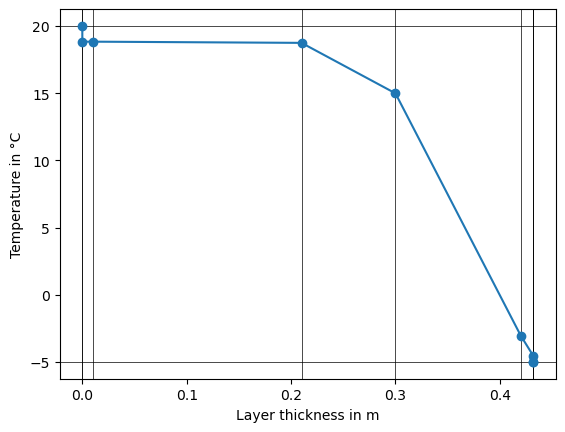

In [85]:
w.plot_temperature()

In [46]:
print(house.components[0])

name: Außenwand, area: 183.60 qm, Rsi: 0.13, Rse: 0.04


In [47]:
house.components[0].info

,thickness,lamda,R-Value,U-Value
name,,,,
Innenputz aus Gipsputzmörtel,0.010,1.010,0.009901,101.000000
Kalksandstein,0.250,1.320,0.189394,5.280000
Mineralwolledämmung,0.090,0.045,2.000000,0.500000
Ziegel,0.120,0.720,0.166667,6.000000
Kunstharzputz,0.012,1.100,0.010909,91.666667


In [48]:
house.info()

,Area,R-Value,U-Value,thickness
name,,,,
Außenwand,183.600,2.546871,0.392639,482.00
Dach,122.808,0.869273,1.150387,38.15


In [74]:
house.energy.head(50)

,energy_needed,buffer_energy,provided_energy,Solar,Gasheizung
time,,,,,
2018-06-01 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.0
2018-06-01 01:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.0
2018-06-01 02:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.0
2018-06-01 03:00:00+00:00,0.000000,0.000000,0.011668,0.011668,0.0
2018-06-01 04:00:00+00:00,0.000000,0.000000,0.198349,0.198349,0.0
2018-06-01 05:00:00+00:00,0.000000,0.000000,0.746726,0.746726,0.0
2018-06-01 06:00:00+00:00,0.000000,0.000000,1.260101,1.260101,0.0
2018-06-01 07:00:00+00:00,0.000000,0.000000,0.840067,0.840067,0.0
2018-06-01 08:00:00+00:00,0.000000,0.000000,2.555204,2.555204,0.0


array([<Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

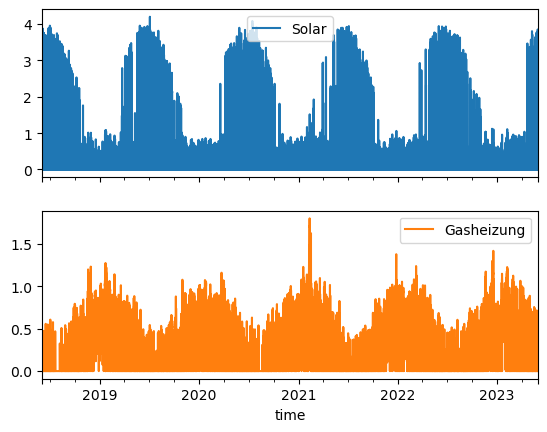

In [75]:
house.energy[['Solar', 'Gasheizung']].plot(subplots=True)

In [76]:
house.energy[['Solar', 'Gasheizung']].sum()

Solar         18015.334750
Gasheizung    13303.056998
dtype: float64

<Axes: xlabel='date'>

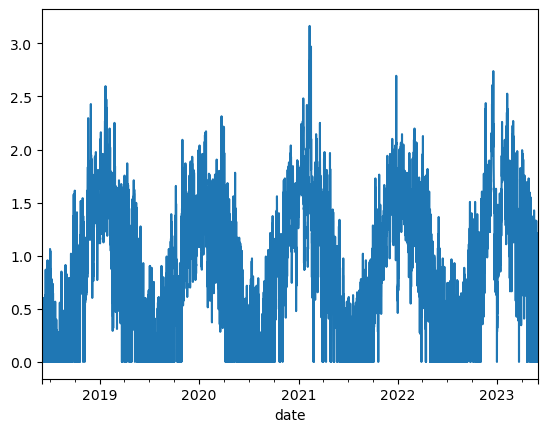

In [77]:
house.transmission_heat_loss_ts['sum'].plot()